<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

In [293]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from scipy.stats import pearsonr
import pylab

%matplotlib inline

### 1.

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

Таблица цен на дома в Бостоне
- CRIM: Это уровень преступности на душу населения по городам
- ZN: Это доля жилой земли, зонированной для участков более 25 000 кв. футов.
- INDUS: Это доля не торговых площадей в каждом городе.
- CHAS: Это фиктивная переменная реки Charles River (она равна 1, если тракт ограничивает реку; в противном случае 0)
- NOX: это концентрация оксидов азота (частей на 10 миллионов)
- RM: это среднее количество комнат на одно жилище
- AGE: Это доля занятых владельцем единиц, построенных до 1940 года
- DIS: Это взвешенные расстояния до пяти бостонских центров занятости
- RAD: Это показатель доступности радиальных магистралей
- TAX: это полная стоимость налога на имущество на 10 000 долларов
- PTRATIO: Это соотношение учеников и учителей по городам
- B: Это рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
- LSTAT: это процент низкого статуса населения
- MEDV: это средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_house=pd.read_csv(url,  delim_whitespace=True, names=names)
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 2.

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



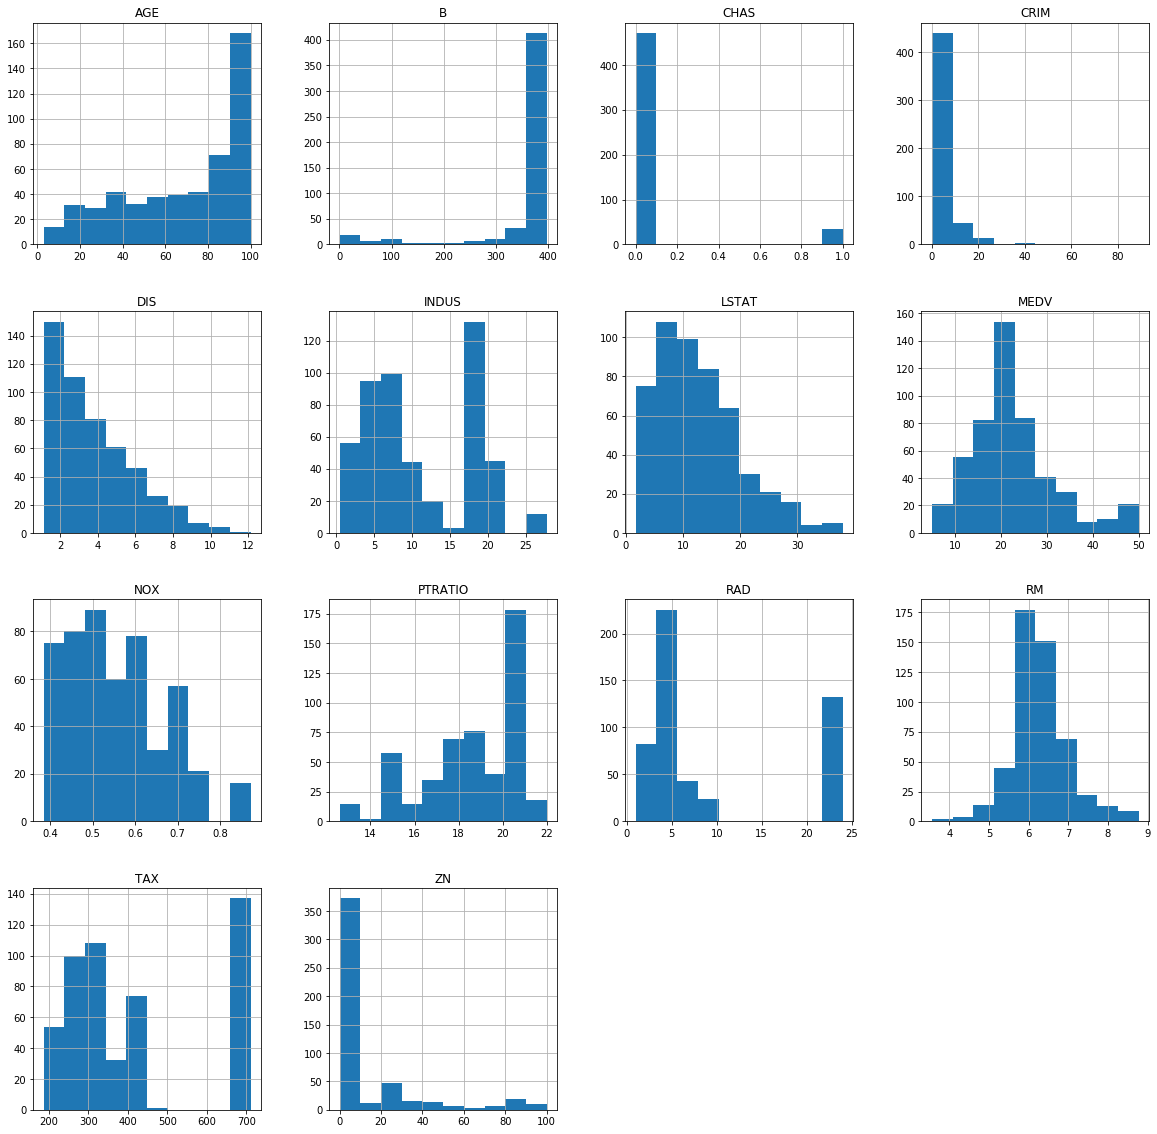

In [23]:
data_house.hist(figsize=(20,20))
plt.show()

по визуальной оценке распределения атрибутов такие:
1.   Нормальное **RM, MEDN** (сред.кол-во комнат и сред.стоимость)
2.   Равномерное **-**
3.   Биноминальное/Геометрическое **PTRATIO, TAX**
4.   Бернулли **CHAS**
5.   Геометрическое **RAD**
6.   Логнормальное **DIS, LSTAT, INDUS, NOX, AGE**
7.   Экспонециальное **CRIM, ZN, B**

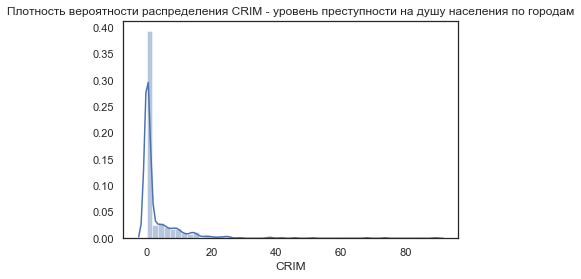

In [248]:
#гистограммы распределения CRIM
sns_plot1 = sns.distplot(data_house['CRIM'])
plt.title('Плотность вероятности распределения CRIM - уровень преступности на душу населения по городам')
fig1 = sns_plot1.get_figure()
plt.show()

In [263]:
len(data_house['CRIM'].unique())

504

распределение CRIM визуально похоже на геометрическое или экспонециальное, возможно и логнормальное
- так как атрибут CRIM непрерывная величина, значит скорее это логнормальное распределение или экспоненциальное
- но так на графике как нет спуска, то это скорее **экспоненциальное**

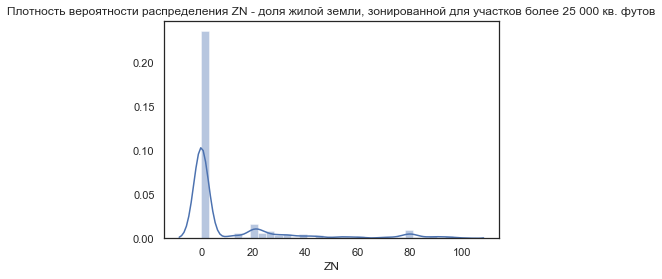

In [249]:
#гистограммы распределения ZN
sns_plot2 = sns.distplot(data_house['ZN'])
plt.title('Плотность вероятности распределения ZN - доля жилой земли, зонированной для участков более 25 000 кв. футов')
fig2 = sns_plot2.get_figure()

In [264]:
data_house['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

распределение ZN визуально похоже на геометрическое или экспонециальное, возможно и логнормальное
- так как атрибут ZN непрерывная величина, значит скорее это логнормальное распределение или экспоненциальное
- но так на графике как нет спуска, то это скорее **экспоненциальное**

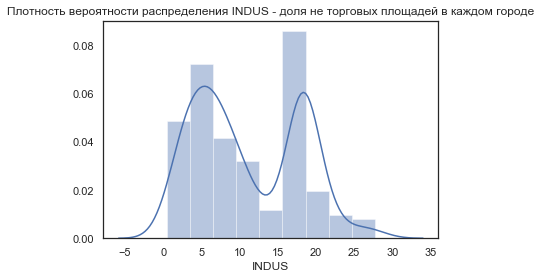

In [250]:
#гистограммы распределения INDUS
sns_plot3 = sns.distplot(data_house['INDUS'])
plt.title('Плотность вероятности распределения INDUS - доля не торговых площадей в каждом городе')
fig3 = sns_plot3.get_figure()

In [275]:
len(data_house['INDUS'].unique())

76

распределение INDUS визуально похоже на биноминальное и логнормальное
- так как атрибут INDUS непрерывная величина, значит скорее это **логнормальное распределение**

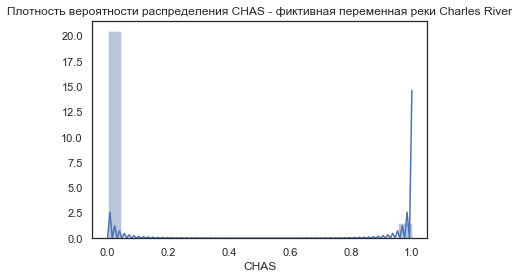

In [251]:
#гистограммы распределения CHAS (она равна 1, если тракт ограничивает реку; в противном случае 0)
sns_plot4 = sns.distplot(data_house['CHAS'])
plt.title('Плотность вероятности распределения CHAS - фиктивная переменная реки Charles River') 
fig4 = sns_plot4.get_figure()

In [276]:
data_house['CHAS'].unique()

array([0, 1], dtype=int64)

распределение CHAS визуально похоже на **распределение Бернули**, величина CHAS дискретная [0,1]

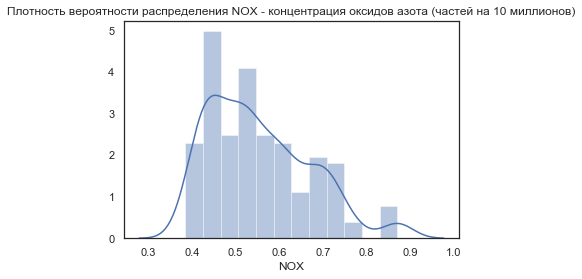

In [252]:
#гистограммы распределения NOX
sns_plot5 = sns.distplot(data_house['NOX'])
plt.title('Плотность вероятности распределения NOX - концентрация оксидов азота (частей на 10 миллионов)')
fig5 = sns_plot5.get_figure()

In [278]:
len(data_house['NOX'].unique())

81

распределение NOX визуально похоже на биноминальное и логнормальное
- так как атрибут NOX непрерывная величина, значит скорее это **логнормальное распределение**

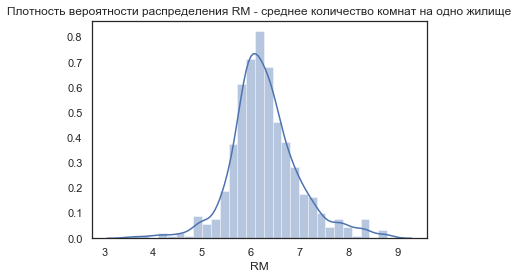

In [253]:
#гистограммы распределения RM
sns_plot6 = sns.distplot(data_house['RM'])
plt.title('Плотность вероятности распределения RM - среднее количество комнат на одно жилище')
fig6 = sns_plot6.get_figure()

распределение RM похоже на **нормальное распределение Гаусса**

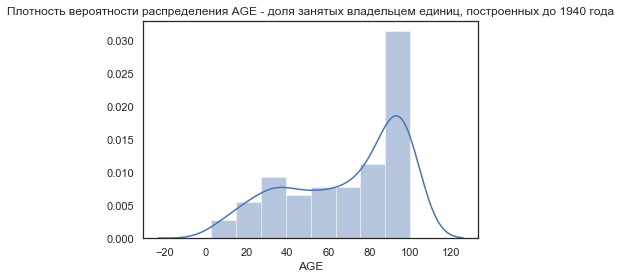

In [254]:
#гистограммы распределения AGE
sns_plot7 = sns.distplot(data_house['AGE'])
plt.title('Плотность вероятности распределения AGE - доля занятых владельцем единиц, построенных до 1940 года')
fig7 = sns_plot7.get_figure()

In [279]:
len(data_house['AGE'].unique())

356

распределение AGE визуально похоже на биноминальное  и логнормальное
- так как атрибут AGE непрерывная величина, значит скорее это **логнормальное распределение**

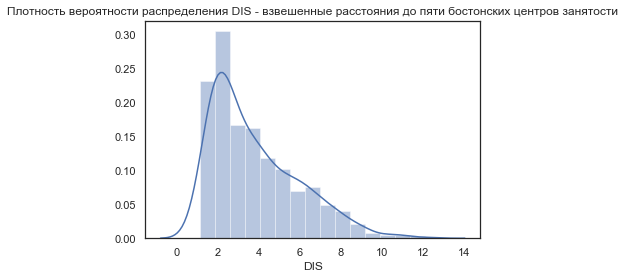

In [255]:
#гистограммы распределения DIS
sns_plot8 = sns.distplot(data_house['DIS'])
plt.title('Плотность вероятности распределения DIS - взвешенные расстояния до пяти бостонских центров занятости')
fig8 = sns_plot8.get_figure()

In [267]:
len(data_house['DIS'].unique())

412

распределение DIS похоже на логнормальное и геометрическое
- так как атрибут DIS непрерывная величина, значит скорее это **логнормальное распределение**

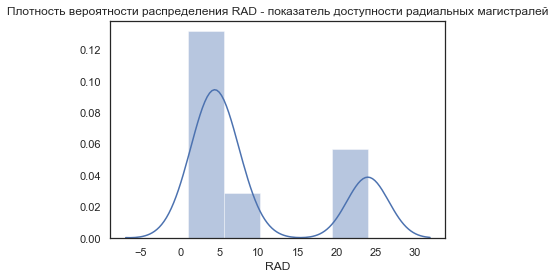

In [269]:
#гистограммы распределения RAD
sns_plot9 = sns.distplot(data_house['RAD'])
plt.title('Плотность вероятности распределения RAD - показатель доступности радиальных магистралей')
fig9 = sns_plot9.get_figure()

In [281]:
data_house['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

распределение RAD визуально похоже на геомерическое или логнормальное
- так как атрибут RAD дискретная величина, значит скорее это **геометрическое**

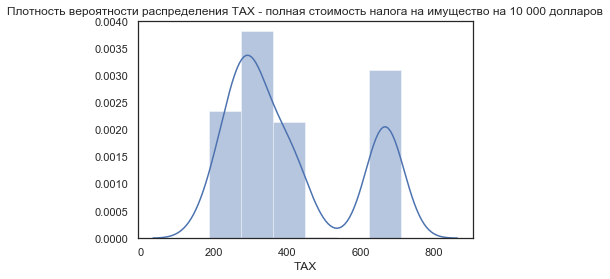

In [285]:
#гистограммы распределения TAX
sns_plot10 = sns.distplot(data_house['TAX'])
plt.title('Плотность вероятности распределения TAX - полная стоимость налога на имущество на 10 000 долларов')
fig10 = sns_plot10.get_figure()

In [282]:
data_house['TAX'].unique()

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

распределение TAX визуально похоже на биноминальное
- так как атрибут TAX дискретная величина, значит скорее это **геометрическое или биноминальное**

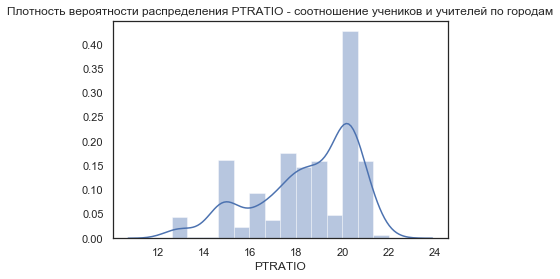

In [258]:
#гистограммы распределения PTRATIO
sns_plot11 = sns.distplot(data_house['PTRATIO'])
plt.title('Плотность вероятности распределения PTRATIO - соотношение учеников и учителей по городам')
fig11 = sns_plot11.get_figure()

In [286]:
data_house['PTRATIO'].unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

распределение PTRATIO визуально похоже на биноминальное
- так как атрибут PTRATIO дискретная величина, значит скорее это **геометрическое или биноминальное**

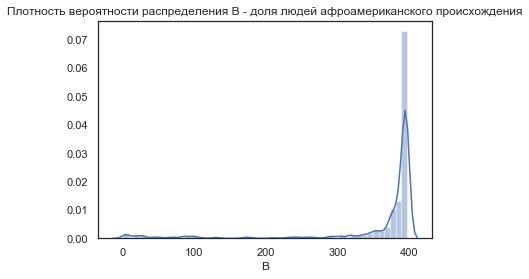

In [259]:
#гистограммы распределения B
sns_plot12 = sns.distplot(data_house['B'])
plt.title('Плотность вероятности распределения B - доля людей афроамериканского происхождения')
fig12 = sns_plot12.get_figure()

In [270]:
len(data_house['B'].unique())

357

распределение B визуально похоже на геометрическое или экспонециальное, возможно и логнормальное
- так как атрибут B непрерывная величина, то скорее это экспонециальное и логнормальное
- так как на графике нет спуска, то это сорее **экспонециальное**

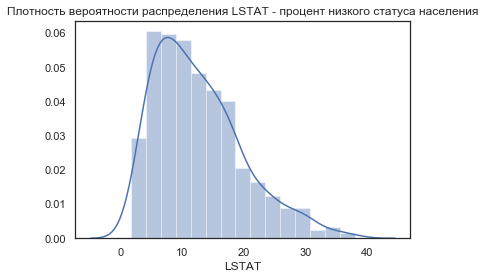

In [260]:
#гистограммы распределения LSTAT
sns_plot13 = sns.distplot(data_house['LSTAT'])
plt.title('Плотность вероятности распределения LSTAT - процент низкого статуса населения')
fig13 = sns_plot13.get_figure()

In [272]:
len(data_house['LSTAT'].unique())

455

распределение LSTAT похоже на логнормальное или биноминальное
- так как атрибут LSTAT непрерывная величина, то скорее это экспонециальное/ логнормальное
- так как есть спуск, то это **логнормальное**

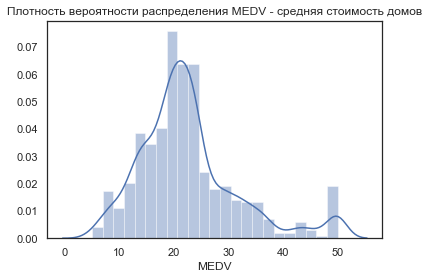

In [261]:
#гистограммы распределения MEDV
sns_plot14 = sns.distplot(data_house['MEDV'])
plt.title('Плотность вероятности распределения MEDV - средняя стоимость домов')
fig14 = sns_plot14.get_figure()

распределение MEDV похоже на **нормальное** с выраженной ассиметрией и с выбросом

### 3.

**3.1.** Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [26]:
#Выделим колонки в отдельный список
headers = list(data_house.columns.values)

In [27]:
#Нормализуем параметры
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_house)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667


In [28]:
#При нормализации стираются названия колонок, поэтому необходимо восстановить их:
df_norm.columns = headers
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667


In [29]:
len(df_norm)

506

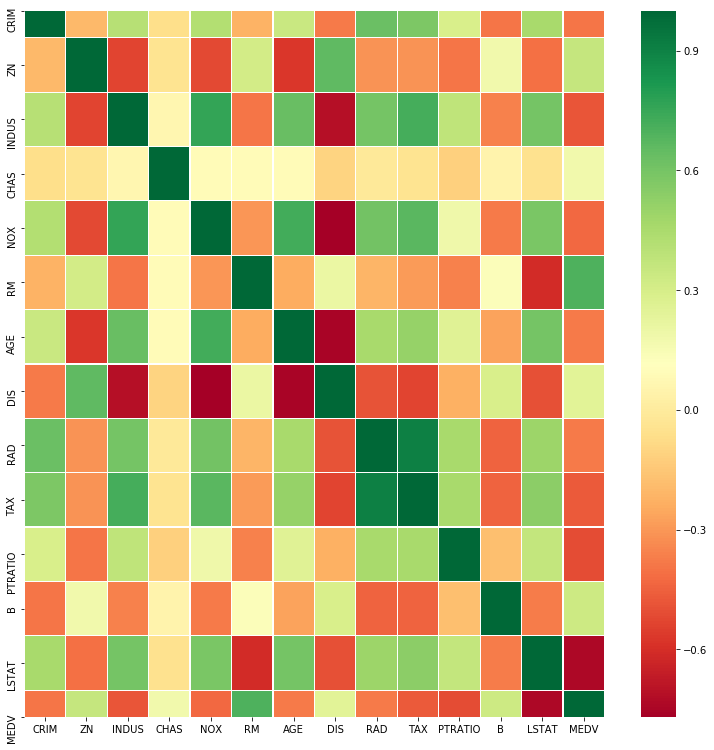

In [30]:
#Построим матрицу корреляций:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

со сред. стоимостью жилья (MEDV)
- полож. коррелируют сред. кол-во комнат (RM) и доля жилой земли (ZN)
- отриц. коррелирует процент низкого статуса населения (LSTAT)

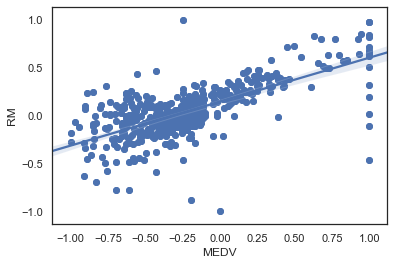

In [229]:
plt.scatter(df_norm['MEDV'], df_norm['RM'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x=df_norm['MEDV'], y=df_norm['RM'], data=df_norm, fit_reg=True)

plt.show()

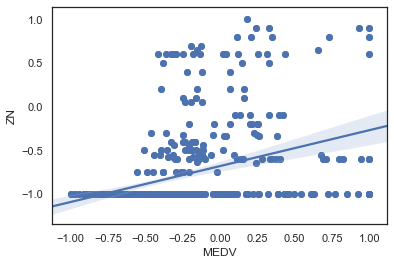

In [230]:
plt.scatter(df_norm['MEDV'], df_norm['ZN'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= df_norm['MEDV'], y=df_norm['ZN'], data=df_norm, fit_reg=True)

plt.show()

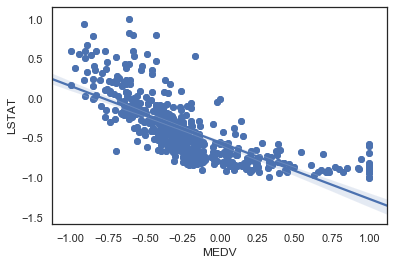

In [231]:
plt.scatter(df_norm['MEDV'], df_norm['LSTAT'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= df_norm['MEDV'], y=df_norm['LSTAT'], data=df_norm, fit_reg=True)

plt.show()

**3.2.** Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [199]:
medv = df_norm['MEDV']
lstat = df_norm['LSTAT']

In [200]:
#Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [193]:
from sklearn.linear_model import LinearRegression

In [201]:
#Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.
model = LinearRegression()

In [208]:
from sklearn.model_selection import train_test_split

#Разделим на 80% тренировочных и на 20% тестовых

# x = lstat - известна
# y = medv - предсказываем
X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2
)

In [209]:
#Обучим модель с помощью fit() метода
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
#Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

In [211]:
#Посчитаем ошибку модели
#model.score - подсчет среднеквадратичной ошибки
model.score(X_test, y_test)

0.5800335933888467

58% точности на тестовых данных

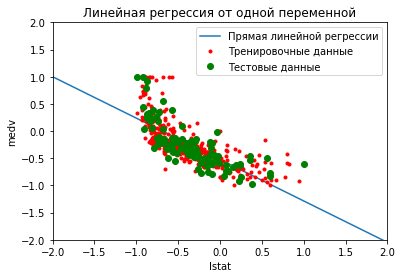

In [217]:
#Построим график линейной регресии

plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-2, 2, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

В данном случае получается обратная зависимость двух переменных:
* чем меньше процент низкого статуса населения (LSTAT), тем выше сред. стоимость жилья в Бостоне (MEDV)

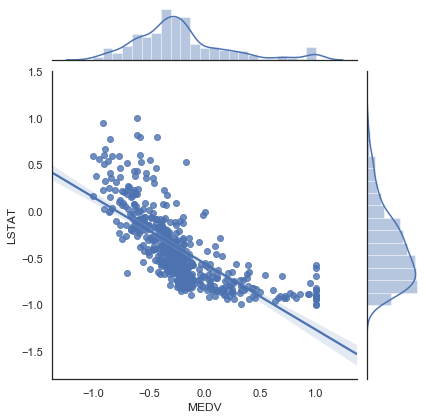

In [234]:
#Jointplot
#'Совместное распределение по двум переменным MEDV и LSTAT'
medv = df_norm['MEDV']
lstat = df_norm['LSTAT']

sns.set(style="white", color_codes=True)
g = sns.jointplot(x=medv, y=lstat, data=df_norm, kind='reg')

plt.show()

### 2.

**2.1.** Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [37]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data_happy=pd.read_csv(url)
data_happy.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Данный датасет представляет собой информацию об уровне "счастья" в странах. В таблице представлены следующие переменные:

- Country - название страны
- Ladder - показатель насколько удовлетворены жизнью
- SD of Ladder - среднеквадратическое отклонение показателя удовлетворенностью жизнью
- Positive affect - показатель позитивных эмоций
- Negative affect - показатель негативных эмоций
- Social support - насколько социальная поддержка повлияла на уровень счастья
- Freedom - насколько показатель степени свободы повлиял на уровень счастья
- Corruption - насколько показатель коррупции влияет на уровень счастья
- Generosity - насколько уровень щедрости влияет на уровень счастья
- Log of GDP per capita - насколько Валовый Внутренний продукт влияет на уровень счастья
- Healthy life expectancy - насколько продолжительность жизни влияет на уровень счастья

In [235]:
#Создадим таблицу X из таблицы data_happy: выбираем все колонки, кроме 'Country (region)'
X = data_happy.iloc[:,1:]
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [236]:
#матрица ковариации общая
X.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


In [237]:
#матрица ковариации общая
X.cov().style.background_gradient(cmap='coolwarm')

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041,1100.84,995.929,1061.21,1657.43,1108.09,370.874,1008.95,1615,1613.37
SD of Ladder,1100.84,2041,173.695,1259.81,1219.52,512.364,506.898,797.779,1254.53,1208.03
Positive affect,995.929,173.695,2015,785.24,778.331,1373.77,405.293,715.078,586.12,647.909
Negative affect,1061.21,1259.81,785.24,2015,1253.1,866.935,309.231,681.526,1050.93,944.803
Social support,1657.43,1219.52,778.331,1253.1,2015,904.539,230.741,891.5,1509.29,1471.92
Freedom,1108.09,512.364,1373.77,866.935,904.539,2015,736.269,987.331,800.927,821.386
Corruption,370.874,506.898,405.293,309.231,230.741,736.269,1837.67,511.333,368.29,233.045
Generosity,1008.95,797.779,715.078,681.526,891.5,987.331,511.333,2015,949.02,836.344
Log of GDP per capita,1615,1254.53,586.12,1050.93,1509.29,800.927,368.29,949.02,1938,1614.03
Healthy life expectancy,1613.37,1208.03,647.909,944.803,1471.92,821.386,233.045,836.344,1614.03,1887.5


'Ladder' и 'SD of Ladder' имеют высокую дисперсию (данные очень сильно разбросаны)

'Corruption' имеет наименьшую дисперсию

ковариация положительна между всеми атрибутами, можно проверить на наличие связи

C:\ProgramData\Anaconda37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


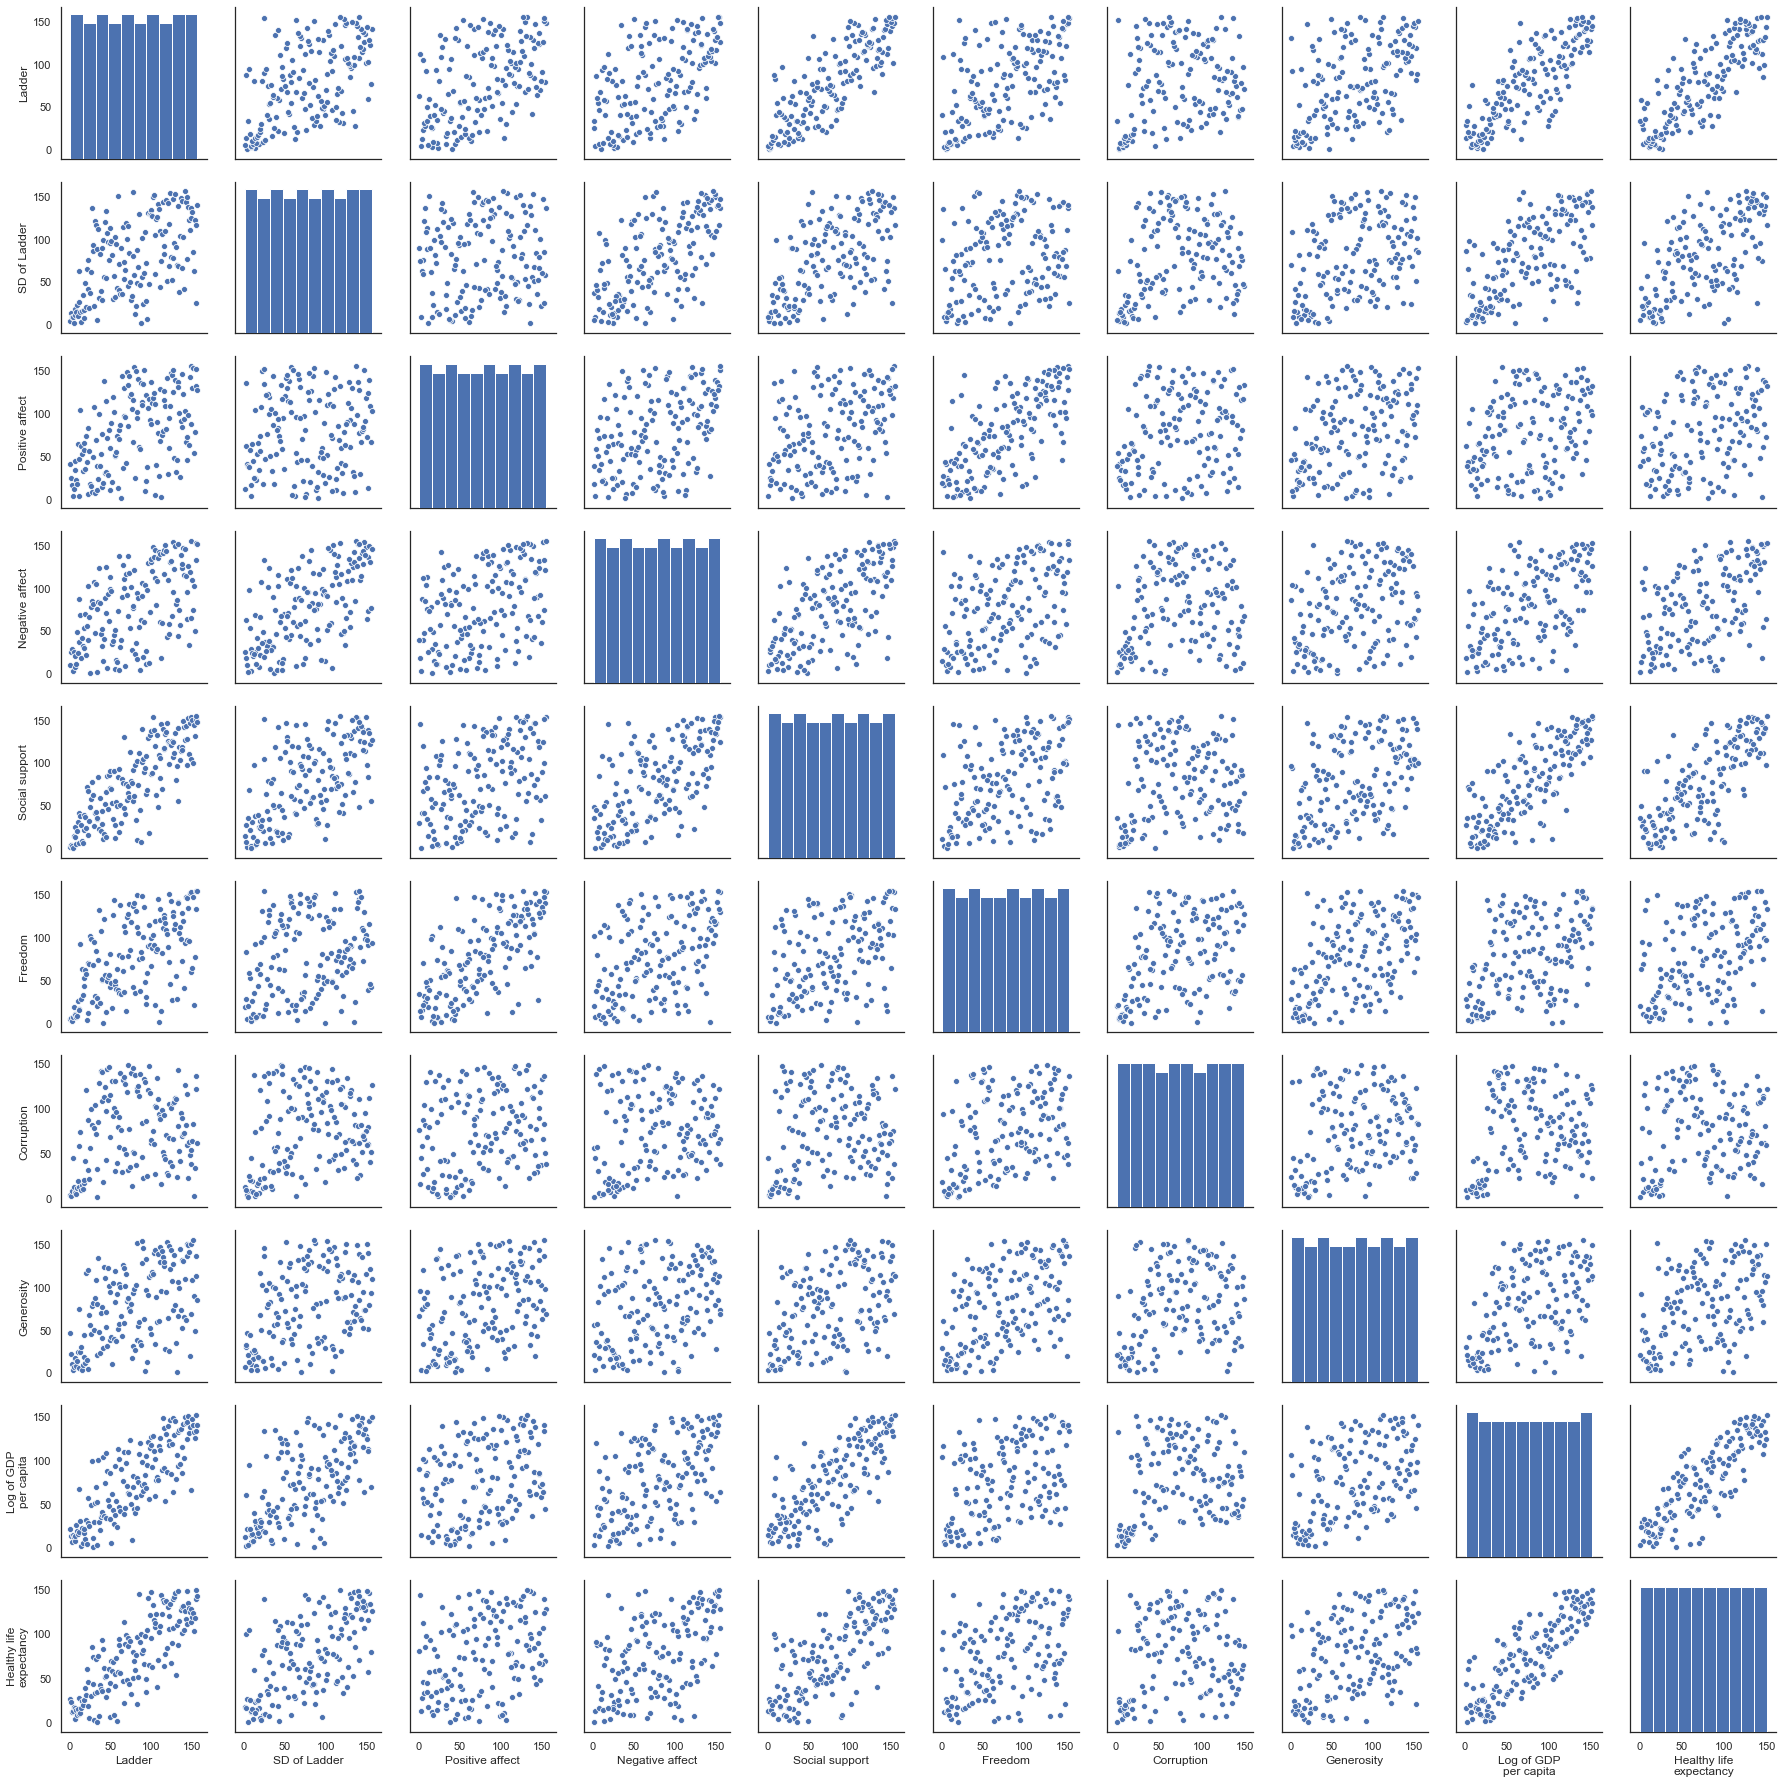

In [238]:
#Построим попарные графики для выборок, а также частотные графики на главной диагонали с помощью метода pairplot.
sns.pairplot(X)

In [39]:
#матрица ковариации
data_happy[['Ladder', 'SD of Ladder']].cov()

,Ladder,SD of Ladder
Ladder,2041.00000,1100.83871
SD of Ladder,1100.83871,2041.00000


у 'Ladder' и 'SD of Ladder'разброс одинаковый

Text(0, 0.5, 'средкв. отклонение показателя удовлетворенностью жизнью')

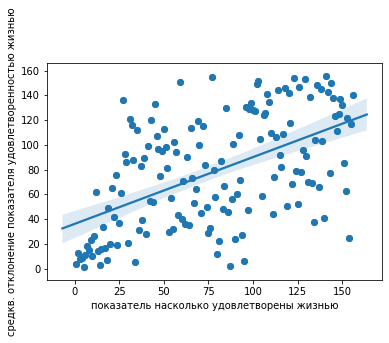

In [148]:
#точечный график
ladder = data_happy['Ladder'] # показатель насколько удовлетворены жизнью
sd_ladder = data_happy['SD of Ladder'] # среднеквадратическое отклонение показателя удовлетворенностью жизнью

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= ladder, y=sd_ladder, data=data_happy, fit_reg=True)

plt.scatter(ladder, sd_ladder)
plt.xlabel('показатель насколько удовлетворены жизнью')
plt.ylabel('средкв. отклонение показателя удовлетворенностью жизнью')

In [40]:
#матрица ковариации
data_happy[['Ladder', 'Positive affect']].cov()

,Ladder,Positive affect
Ladder,2041.000000,995.928571
Positive affect,995.928571,2015.000000


In [41]:
#матрица ковариации
data_happy[['Ladder', 'Negative affect']].cov()

,Ladder,Negative affect
Ladder,2041.000000,1061.207792
Negative affect,1061.207792,2015.000000


In [42]:
#матрица ковариации
data_happy[['Ladder', 'Social support']].cov()

,Ladder,Social support
Ladder,2041.000000,1657.428571
Social support,1657.428571,2015.000000


In [43]:
#матрица ковариации
data_happy[['Ladder', 'Freedom']].cov()

,Ladder,Freedom
Ladder,2041.000000,1108.090909
Freedom,1108.090909,2015.000000


In [44]:
#матрица ковариации
data_happy[['Ladder', 'Corruption']].cov()

,Ladder,Corruption
Ladder,2041.00000,370.874150
Corruption,370.87415,1837.666667


In [45]:
#матрица ковариации
data_happy[['Ladder', 'Generosity']].cov()

,Ladder,Generosity
Ladder,2041.000000,1008.948052
Generosity,1008.948052,2015.000000


In [47]:
#матрица ковариации
data_happy[['Ladder', 'Log of GDP\nper capita']].cov()

,Ladder,Log of GDP\nper capita
Ladder,2041.0,1615.0
Log of GDP\nper capita,1615.0,1938.0


In [48]:
#матрица ковариации
data_happy[['Ladder', 'Healthy life\nexpectancy']].cov()

,Ladder,Healthy life\nexpectancy
Ladder,2041.000000,1613.369128
Healthy life\nexpectancy,1613.369128,1887.500000


In [49]:
#матрица ковариации
data_happy[['SD of Ladder', 'Positive affect']].cov()

,SD of Ladder,Positive affect
SD of Ladder,2041.000000,173.694805
Positive affect,173.694805,2015.000000


In [50]:
#матрица ковариации
data_happy[['SD of Ladder', 'Negative affect']].cov()

,SD of Ladder,Negative affect
SD of Ladder,2041.000000,1259.805195
Negative affect,1259.805195,2015.000000


In [51]:
#матрица ковариации
data_happy[['SD of Ladder', 'Social support']].cov()

,SD of Ladder,Social support
SD of Ladder,2041.000000,1219.519481
Social support,1219.519481,2015.000000


In [52]:
#матрица ковариации
data_happy[['SD of Ladder', 'Freedom']].cov()

,SD of Ladder,Freedom
SD of Ladder,2041.000000,512.363636
Freedom,512.363636,2015.000000


In [53]:
#матрица ковариации
data_happy[['SD of Ladder', 'Corruption']].cov()

,SD of Ladder,Corruption
SD of Ladder,2041.000000,506.897959
Corruption,506.897959,1837.666667


In [54]:
#матрица ковариации
data_happy[['SD of Ladder', 'Generosity']].cov()

,SD of Ladder,Generosity
SD of Ladder,2041.000000,797.779221
Generosity,797.779221,2015.000000


In [55]:
#матрица ковариации
data_happy[['SD of Ladder', 'Log of GDP\nper capita']].cov()

,SD of Ladder,Log of GDP\nper capita
SD of Ladder,2041.00000,1254.52649
Log of GDP\nper capita,1254.52649,1938.00000


In [56]:
#матрица ковариации
data_happy[['SD of Ladder', 'Healthy life\nexpectancy']].cov()

,SD of Ladder,Healthy life\nexpectancy
SD of Ladder,2041.000000,1208.026846
Healthy life\nexpectancy,1208.026846,1887.500000


In [57]:
#матрица ковариации
data_happy[['Positive affect','Negative affect']].cov()

,Positive affect,Negative affect
Positive affect,2015.00000,785.24026
Negative affect,785.24026,2015.00000


у 'Positive affect' и'Negative affect' разброс одинаковый

Text(0, 0.5, 'показатель негативных эмоций')

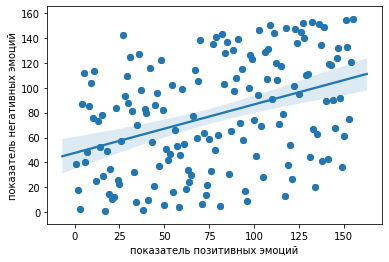

In [149]:
#точечный график
positive = data_happy['Positive affect'] # показатель позитивных эмоций
negative = data_happy['Negative affect'] # показатель негативных эмоций

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= positive, y=negative, data=data_happy, fit_reg=True)

plt.scatter(positive, negative)
plt.xlabel('показатель позитивных эмоций')
plt.ylabel('показатель негативных эмоций')

In [65]:
#матрица ковариации
data_happy[['Positive affect', 'Social support']].cov()

,Positive affect,Social support
Positive affect,2015.000000,778.331169
Social support,778.331169,2015.000000


у 'Positive affect' и 'Social support' разброс одинаковый

Text(0, 0.5, 'влияние соц. поддержки')

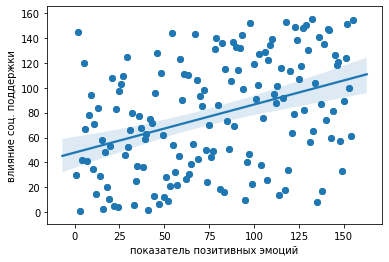

In [150]:
#точечный график
positive = data_happy['Positive affect'] # показатель позитивных эмоций
ssupport = data_happy['Social support'] # насколько социальная поддержка повлияла на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= positive, y=ssupport, data=data_happy, fit_reg=True)

plt.scatter(positive, ssupport)
plt.xlabel('показатель позитивных эмоций')
plt.ylabel('влияние соц. поддержки')

In [67]:
#матрица ковариации
data_happy[['Positive affect', 'Freedom']].cov()

,Positive affect,Freedom
Positive affect,2015.000000,1373.766234
Freedom,1373.766234,2015.000000


у 'Positive affect' и 'Freedom' разброс одинаковый

Text(0, 0.5, 'влияние пок. степени свободы')

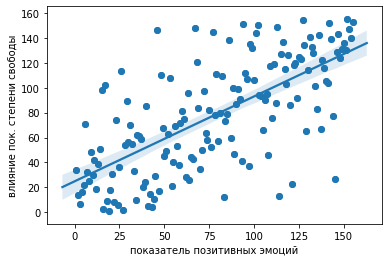

In [151]:
#точечный график
positive = data_happy['Positive affect'] # показатель позитивных эмоций
freedom = data_happy['Freedom'] # насколько показатель степени свободы повлиял на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= positive, y=freedom, data=data_happy, fit_reg=True)

plt.scatter(positive, freedom)
plt.xlabel('показатель позитивных эмоций')
plt.ylabel('влияние пок. степени свободы')

In [69]:
#матрица ковариации
data_happy[['Positive affect', 'Corruption']].cov()

,Positive affect,Corruption
Positive affect,2015.000000,405.292517
Corruption,405.292517,1837.666667


In [70]:
#матрица ковариации
data_happy[['Positive affect', 'Generosity']].cov()

,Positive affect,Generosity
Positive affect,2015.000000,715.077922
Generosity,715.077922,2015.000000


у 'Positive affect' и 'Generosity' разброс одинаковый

Text(0, 0.5, 'влияние уровня щедрости')

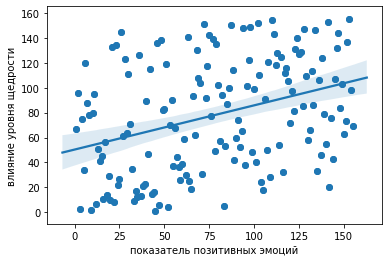

In [152]:
#точечный график
positive = data_happy['Positive affect'] # показатель позитивных эмоций
generosity = data_happy['Generosity'] # насколько уровень щедрости влияет на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= positive, y=generosity, data=data_happy, fit_reg=True)

plt.scatter(positive, generosity)
plt.xlabel('показатель позитивных эмоций')
plt.ylabel('влияние уровня щедрости')

In [72]:
#матрица ковариации
data_happy[['Positive affect', 'Log of GDP\nper capita']].cov()

,Positive affect,Log of GDP\nper capita
Positive affect,2015.00,586.12
Log of GDP\nper capita,586.12,1938.00


In [73]:
#матрица ковариации
data_happy[['Positive affect', 'Healthy life\nexpectancy']].cov()

,Positive affect,Healthy life\nexpectancy
Positive affect,2015.000000,647.908897
Healthy life\nexpectancy,647.908897,1887.500000


In [74]:
#матрица ковариации
data_happy[['Negative affect', 'Social support']].cov()

,Negative affect,Social support
Negative affect,2015.000000,1253.103896
Social support,1253.103896,2015.000000


у 'Negative affect' и 'Social support' разброс одинаковый

Text(0, 0.5, 'влияние соц. поддержки')

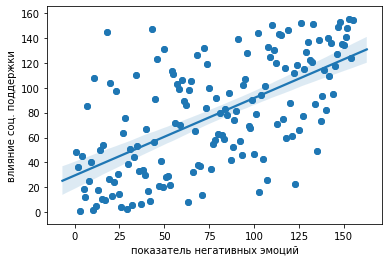

In [153]:
#точечный график
negative = data_happy['Negative affect'] # показатель негативных эмоций
ssupport = data_happy['Social support'] # насколько социальная поддержка повлияла на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= negative, y=ssupport, data=data_happy, fit_reg=True)

plt.scatter(negative, ssupport)
plt.xlabel('показатель негативных эмоций')
plt.ylabel('влияние соц. поддержки')

In [76]:
#матрица ковариации
data_happy[['Negative affect', 'Freedom']].cov()

,Negative affect,Freedom
Negative affect,2015.000000,866.935065
Freedom,866.935065,2015.000000


у 'Negative affect' и 'Freedom' разброс одинаковый

Text(0, 0.5, 'влияние пок. степени свободы')

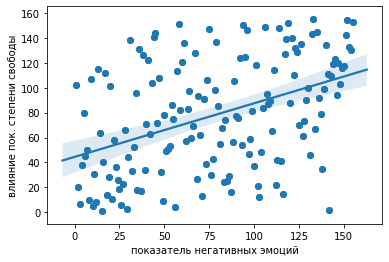

In [154]:
#точечный график
negative = data_happy['Negative affect'] # показатель негативных эмоций
freedom = data_happy['Freedom'] # насколько показатель степени свободы повлиял на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= negative, y=freedom, data=data_happy, fit_reg=True)

plt.scatter(negative, freedom)
plt.xlabel('показатель негативных эмоций')
plt.ylabel('влияние пок. степени свободы')

In [78]:
#матрица ковариации
data_happy[['Negative affect', 'Corruption']].cov()

,Negative affect,Corruption
Negative affect,2015.000000,309.231293
Corruption,309.231293,1837.666667


In [79]:
#матрица ковариации
data_happy[['Negative affect', 'Generosity']].cov()

,Negative affect,Generosity
Negative affect,2015.000000,681.525974
Generosity,681.525974,2015.000000


у 'Negative affect' и 'Generosity' разброс одинаковый

Text(0, 0.5, 'влияние уровня щедрости')

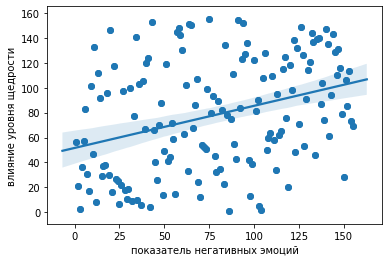

In [155]:
#точечный график
negative = data_happy['Negative affect'] # показатель негативных эмоций
generosity = data_happy['Generosity'] #  насколько уровень щедрости влияет на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= negative, y=generosity, data=data_happy, fit_reg=True)

plt.scatter(negative, generosity)
plt.xlabel('показатель негативных эмоций')
plt.ylabel('влияние уровня щедрости')

In [81]:
#матрица ковариации
data_happy[['Negative affect', 'Log of GDP\nper capita']].cov()

,Negative affect,Log of GDP\nper capita
Negative affect,2015.000000,1050.926667
Log of GDP\nper capita,1050.926667,1938.000000


In [82]:
#матрица ковариации
data_happy[['Negative affect', 'Healthy life\nexpectancy']].cov()

,Negative affect,Healthy life\nexpectancy
Negative affect,2015.000000,944.803192
Healthy life\nexpectancy,944.803192,1887.500000


In [84]:
#матрица ковариации
data_happy[['Social support', 'Freedom']].cov()

,Social support,Freedom
Social support,2015.000000,904.538961
Freedom,904.538961,2015.000000


у 'Social support' и 'Freedom' разброс одинаковый

Text(0, 0.5, 'влияние соц. поддержки')

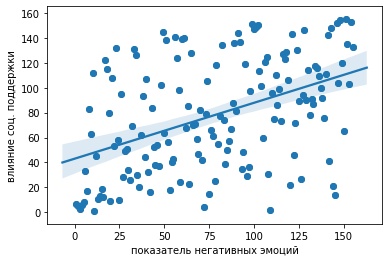

In [156]:
#точечный график
ssupport = data_happy['Social support'] # # насколько социальная поддержка повлияла на уровень счастья
freedom = data_happy['Freedom'] # насколько показатель степени свободы повлиял на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= ssupport, y=freedom, data=data_happy, fit_reg=True)

plt.scatter(ssupport, freedom)
plt.xlabel('показатель негативных эмоций')
plt.ylabel('влияние соц. поддержки')

In [86]:
#матрица ковариации
data_happy[['Social support', 'Corruption']].cov()

,Social support,Corruption
Social support,2015.000000,230.741497
Corruption,230.741497,1837.666667


In [87]:
#матрица ковариации
data_happy[['Social support', 'Generosity']].cov()

,Social support,Generosity
Social support,2015.0,891.5
Generosity,891.5,2015.0


у 'Social support' и 'Generosity' разброс одинаковый

Text(0, 0.5, 'влияние уровня щедрости')

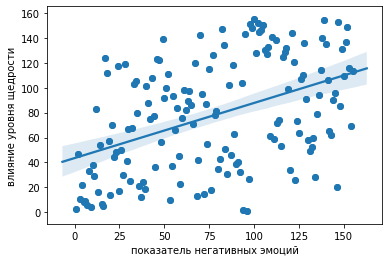

In [157]:
#точечный график
ssupport = data_happy['Social support'] # # насколько социальная поддержка повлияла на уровень счастья
generosity = data_happy['Generosity'] # насколько уровень щедрости влияет на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= ssupport, y=generosity, data=data_happy, fit_reg=True)

plt.scatter(ssupport, generosity)
plt.xlabel('показатель негативных эмоций')
plt.ylabel('влияние уровня щедрости')

In [90]:
#матрица ковариации
data_happy[['Social support', 'Log of GDP\nper capita']].cov()

,Social support,Log of GDP\nper capita
Social support,2015.000000,1509.293333
Log of GDP\nper capita,1509.293333,1938.000000


In [91]:
#матрица ковариации
data_happy[['Social support', 'Healthy life\nexpectancy']].cov()

,Social support,Healthy life\nexpectancy
Social support,2015.0000,1471.9191
Healthy life\nexpectancy,1471.9191,1887.5000


In [93]:
#матрица ковариации
data_happy[['Freedom', 'Corruption']].cov()

,Freedom,Corruption
Freedom,2015.000000,736.268707
Corruption,736.268707,1837.666667


In [94]:
#матрица ковариации
data_happy[['Freedom', 'Generosity']].cov()

,Freedom,Generosity
Freedom,2015.000000,987.331169
Generosity,987.331169,2015.000000


у 'Freedom' и 'Generosity' разброс одинаковый

Text(0, 0.5, 'влияние уровня щедрости')

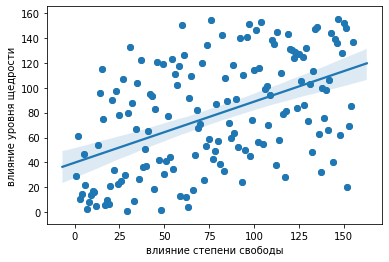

In [158]:
#точечный график
freedom = data_happy['Freedom'] # насколько показатель степени свободы повлиял на уровень счастья
generosity = data_happy['Generosity'] # насколько уровень щедрости влияет на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= freedom, y=generosity, data=data_happy, fit_reg=True)

plt.scatter(freedom, generosity)
plt.xlabel('влияние степени свободы')
plt.ylabel('влияние уровня щедрости')

In [96]:
#матрица ковариации
data_happy[['Freedom', 'Log of GDP\nper capita']].cov()

,Freedom,Log of GDP\nper capita
Freedom,2015.000000,800.926667
Log of GDP\nper capita,800.926667,1938.000000


In [97]:
#матрица ковариации
data_happy[['Freedom', 'Healthy life\nexpectancy']].cov()

,Freedom,Healthy life\nexpectancy
Freedom,2015.000000,821.386087
Healthy life\nexpectancy,821.386087,1887.500000


In [98]:
#матрица ковариации
data_happy[['Corruption', 'Generosity']].cov()

,Corruption,Generosity
Corruption,1837.666667,511.333333
Generosity,511.333333,2015.000000


In [99]:
#матрица ковариации
data_happy[['Corruption', 'Log of GDP\nper capita']].cov()

,Corruption,Log of GDP\nper capita
Corruption,1837.666667,368.289773
Log of GDP\nper capita,368.289773,1938.000000


In [100]:
#матрица ковариации
data_happy[['Corruption', 'Healthy life\nexpectancy']].cov()

,Corruption,Healthy life\nexpectancy
Corruption,1837.666667,233.044951
Healthy life\nexpectancy,233.044951,1887.500000


у 'Corruption' и 'Healthy life\nexpectancy' разброс одинаковый

Text(0, 0.5, 'влияние продолжительности жизни')

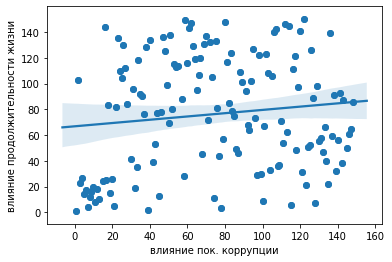

In [159]:
#точечный график
corruption = data_happy['Corruption'] #насколько показатель коррупции влияет на уровень счастья
healthy = data_happy['Healthy life\nexpectancy'] # насколько продолжительность жизни влияет на уровень счастья

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= corruption, y=healthy, data=data_happy, fit_reg=True)

plt.scatter(corruption, healthy)
plt.xlabel('влияние пок. коррупции')
plt.ylabel('влияние продолжительности жизни')

In [102]:
#матрица ковариации
data_happy[['Generosity', 'Log of GDP\nper capita']].cov()

,Generosity,Log of GDP\nper capita
Generosity,2015.00,949.02
Log of GDP\nper capita,949.02,1938.00


In [103]:
#матрица ковариации
data_happy[['Generosity', 'Healthy life\nexpectancy']].cov()

,Generosity,Healthy life\nexpectancy
Generosity,2015.000000,836.343869
Healthy life\nexpectancy,836.343869,1887.500000


In [104]:
#матрица ковариации
data_happy[['Log of GDP\nper capita', 'Healthy life\nexpectancy']].cov()

,Log of GDP\nper capita,Healthy life\nexpectancy
Log of GDP\nper capita,1938.00000,1614.02597
Healthy life\nexpectancy,1614.02597,1887.50000


**2.2.** Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [117]:
df1 = data_happy.loc[pd.isnull(data_happy['Country (region)']), :]
df1

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [118]:
df2 = data_happy.loc[pd.isnull(data_happy['Ladder']), :]
df2

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [119]:
df3 = data_happy.loc[pd.isnull(data_happy['SD of Ladder']), :]
df3

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [120]:
df4 = data_happy.loc[pd.isnull(data_happy['Positive affect']), :]
df4

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [121]:
df5 = data_happy.loc[pd.isnull(data_happy['Negative affect']), :]
df5

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [123]:
df6 = data_happy.loc[pd.isnull(data_happy['Social support']), :]
df6

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [124]:
df7 = data_happy.loc[pd.isnull(data_happy['Freedom']), :]
df7

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [125]:
df8 = data_happy.loc[pd.isnull(data_happy['Corruption']), :]
df8

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0
86,Turkmenistan,87,2,135.0,63.0,8.0,83.0,NaN,33.0,60.0,100.0
92,China,93,72,21.0,11.0,108.0,31.0,NaN,133.0,68.0,34.0
100,Jordan,101,127,112.0,120.0,88.0,88.0,NaN,118.0,92.0,63.0


In [126]:
df9 = data_happy.loc[pd.isnull(data_happy['Generosity']), :]
df9

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [127]:
df10 = data_happy.loc[pd.isnull(data_happy['Log of GDP\nper capita']), :]
df10

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
111,Somalia,112,74,2.0,18.0,145.0,14.0,16.0,96.0,NaN,144.0
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0


In [128]:
df11 = data_happy.loc[pd.isnull(data_happy['Healthy life\nexpectancy']), :]
df11

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
45,Kosovo,46,107,71.0,7.0,85.0,50.0,144.0,31.0,88.0,NaN
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
75,Hong Kong,76,33,105.0,28.0,76.0,66.0,14.0,18.0,9.0,NaN
109,Palestinian Territories,110,110,128.0,140.0,82.0,134.0,90.0,147.0,112.0,NaN
134,Swaziland,135,104,26.0,57.0,103.0,113.0,41.0,145.0,96.0,NaN


In [131]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

result = pd.concat(frames)
rez = result.drop_duplicates(keep='first')
rez

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0
86,Turkmenistan,87,2,135.0,63.0,8.0,83.0,NaN,33.0,60.0,100.0
92,China,93,72,21.0,11.0,108.0,31.0,NaN,133.0,68.0,34.0
100,Jordan,101,127,112.0,120.0,88.0,88.0,NaN,118.0,92.0,63.0
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN


In [132]:
len(rez)

16

В выборке 16 строк с отсутствующими значениями. Для атрибута 'Country (region)' отсут. значений нет.

**2.3** Сколько стран в выборке? Написать ответ. 

In [135]:
#страны
data_happy['Country (region)'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajik

In [137]:
#кол-во стран
len(data_happy['Country (region)'].unique())

156

**2.4** Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [139]:
dh = data_happy.iloc[:,1:]
dh.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.54,0.49,0.52,0.82,0.55,0.19,0.5,0.81,0.82
SD of Ladder,0.54,1,0.085,0.62,0.6,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.085,1,0.39,0.39,0.68,0.21,0.35,0.3,0.33
Negative affect,0.52,0.62,0.39,1,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.6,0.39,0.62,1,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1,0.27,0.2,0.12
Generosity,0.5,0.39,0.35,0.34,0.44,0.49,0.27,1,0.48,0.43
Log of GDP per capita,0.81,0.63,0.3,0.54,0.77,0.41,0.2,0.48,1,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1


по матрице корреляции можно сделать вывод, что

**есть высока связь между атрибутами** 
- 'Ladder' и 'Social support'
- 'Ladder' и 'Healthy life expectancy'
- 'Log of GDP per capita' и 'Healthy life expectancy'

**связь слабая между атрибутами** 
- 'Ladder' и 'Corruption'
- 'SD of Ladder' и 'Positive affect'
- 'Negative affect'и'Corruption'
- 'Social support' и'Corruption'
- 'Corruption' и 'Healthy life expectancy'

где:
- Ladder - показатель насколько удовлетворены жизнью
- SD of Ladder - среднеквадратическое отклонение показателя удовлетворенностью жизнью
- Positive affect - показатель позитивных эмоций
- Negative affect - показатель негативных эмоций
- Social support - насколько социальная поддержка повлияла на уровень счастья
- Corruption - насколько показатель коррупции влияет на уровень счастья
- Log of GDP per capita - насколько Валовый Внутренний продукт влияет на уровень счастья
- Healthy life expectancy - насколько продолжительность жизни влияет на уровень счастья

In [140]:
np.round_(dh.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


# Дискретное распределение случайной величины

**1.Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?**

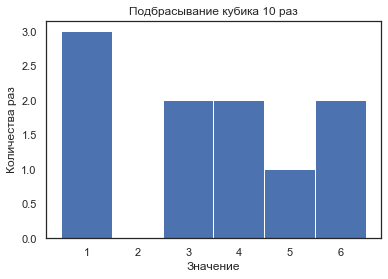

In [328]:
# Количество испытаний
trials = 10

# Массив значений
values = np.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

распределение похоже на равномерное

Trials = 10 times
Mean = 3.5
Standard deviation = 1.746424919657298


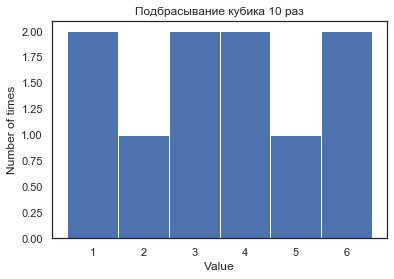

In [343]:
number_of_trials = 10

list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(np.random.randint(1,7))
    
print(f'Trials = {number_of_trials} times')
print(f'Mean = {pylab.mean(list_of_values)}')
print(f'Standard deviation = {pylab.std(list_of_values)}')

pylab.hist(list_of_values, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.title('Подбрасывание кубика ' + str(number_of_trials) + ' раз')
pylab.show()

**2. Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?**

Mean = 1.7157882599066319
Standard deviation = 1.0233622909482278


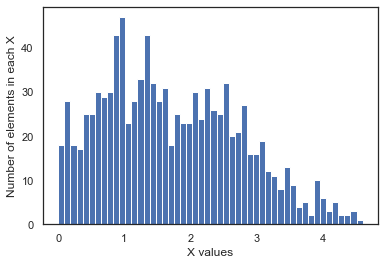

In [345]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(np.random.randint(1,7)))#/number_of_randoms
    
print(f'Mean = {pylab.mean(X1)}')
print(f'Standard deviation = {pylab.std(X1)}')

plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Суммы элементов элементов выборок стремятся к нормальному распределению.